In [203]:
#Imports

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mp

%matplotlib inline 

import math
import random 
from datetime import timedelta
from datetime import datetime

import seaborn as sns
    
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [204]:
# import dataset
df = pd.read_csv("assets/outlier_df.csv", parse_dates=["date"])
btc = pd.read_csv("assets/outlier_btc.csv", parse_dates=["date"])

<AxesSubplot:xlabel='close', ylabel='Density'>

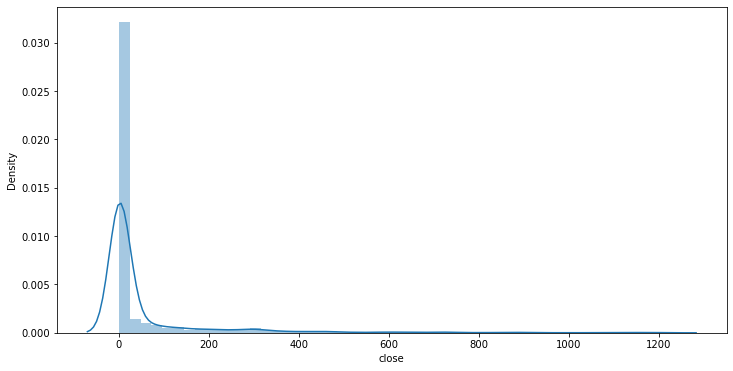

In [205]:
plt.figure(figsize=(12,6))
sns.distplot(df['close'])

<AxesSubplot:xlabel='volume', ylabel='Density'>

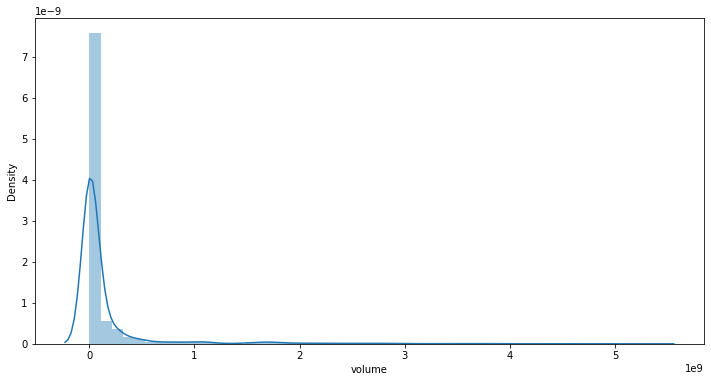

In [206]:
plt.figure(figsize=(12,6))
sns.distplot(df['volume'])

<AxesSubplot:xlabel='market', ylabel='Density'>

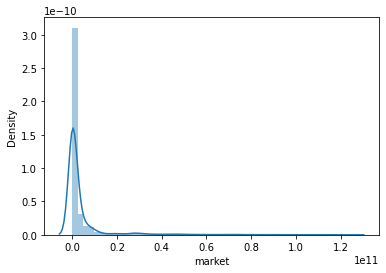

In [207]:
sns.distplot(df['market'])

<AxesSubplot:xlabel='profit\\loss', ylabel='Density'>

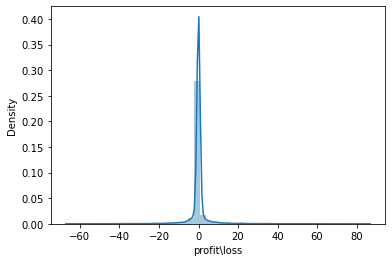

In [208]:
sns.distplot(df['profit\loss'])

In [209]:
df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.010357,0.010358,0.009281,0.009653,1.779650e+05,7.546351e+07,0.345404,0.001077,-0.000704
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.009677,0.009903,0.008700,0.008785,2.445980e+05,6.867805e+07,0.070657,0.001203,-0.000892
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.008785,0.009319,0.008588,0.008757,1.727090e+05,6.845813e+07,0.231190,0.000731,-0.000028
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.008795,0.009021,0.007707,0.007922,3.068890e+05,6.193106e+07,0.163623,0.001314,-0.000873
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.007901,0.008027,0.007176,0.007944,1.728730e+05,6.210829e+07,0.902468,0.000851,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,19.720000,20.180000,17.940000,18.090000,6.974976e+07,1.175830e+09,0.066964,2.240000,-1.630000
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,18.120000,19.340000,17.800000,18.450000,6.978936e+07,1.199010e+09,0.422078,1.540000,0.330000
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,18.570000,18.860000,18.240000,18.490000,6.988110e+07,1.201960e+09,0.403226,0.620000,-0.080000
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,18.540000,18.820000,17.170000,17.600000,7.045643e+07,1.144182e+09,0.260606,1.650000,-0.940000


#### Normalization

In [210]:
df['profit\loss'].min()

-64.87

In [211]:
for i in range (len(df)):
    df.at[df.index==i,'profit\loss'] = df[df.index==i]['profit\loss'] + (64.87)

In [212]:
df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.010357,0.010358,0.009281,0.009653,1.779650e+05,7.546351e+07,0.345404,0.001077,64.869296
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.009677,0.009903,0.008700,0.008785,2.445980e+05,6.867805e+07,0.070657,0.001203,64.869108
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.008785,0.009319,0.008588,0.008757,1.727090e+05,6.845813e+07,0.231190,0.000731,64.869972
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.008795,0.009021,0.007707,0.007922,3.068890e+05,6.193106e+07,0.163623,0.001314,64.869127
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.007901,0.008027,0.007176,0.007944,1.728730e+05,6.210829e+07,0.902468,0.000851,64.870043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,19.720000,20.180000,17.940000,18.090000,6.974976e+07,1.175830e+09,0.066964,2.240000,63.240000
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,18.120000,19.340000,17.800000,18.450000,6.978936e+07,1.199010e+09,0.422078,1.540000,65.200000
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,18.570000,18.860000,18.240000,18.490000,6.988110e+07,1.201960e+09,0.403226,0.620000,64.790000
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,18.540000,18.820000,17.170000,17.600000,7.045643e+07,1.144182e+09,0.260606,1.650000,63.930000


In [213]:
cols_to_norm = ['open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread','profit\loss']


In [214]:
df['volume'][0]

177965.0

In [215]:
normalized_df = df.copy()

for column in normalized_df[cols_to_norm]:
    normalized_df[column] = (normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min())

normalized_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.000008,0.000008,0.000008,0.000008,0.000033,0.000605,0.345404,0.000004,0.434083
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.000008,0.000007,0.000008,0.000007,0.000046,0.000551,0.070657,0.000005,0.434081
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.000007,0.000007,0.000008,0.000007,0.000032,0.000549,0.231190,0.000003,0.434087
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.000007,0.000007,0.000007,0.000006,0.000058,0.000497,0.163623,0.000005,0.434081
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.000006,0.000006,0.000006,0.000006,0.000032,0.000498,0.902468,0.000003,0.434088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,0.016237,0.015370,0.015896,0.014910,0.013091,0.009434,0.066964,0.008509,0.423180
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,0.014919,0.014730,0.015772,0.015207,0.013099,0.009620,0.422078,0.005850,0.436296
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,0.015290,0.014364,0.016161,0.015240,0.013116,0.009643,0.403226,0.002355,0.433552
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,0.015265,0.014334,0.015213,0.014507,0.013224,0.009180,0.260606,0.006268,0.427797


<AxesSubplot:xlabel='close', ylabel='Density'>

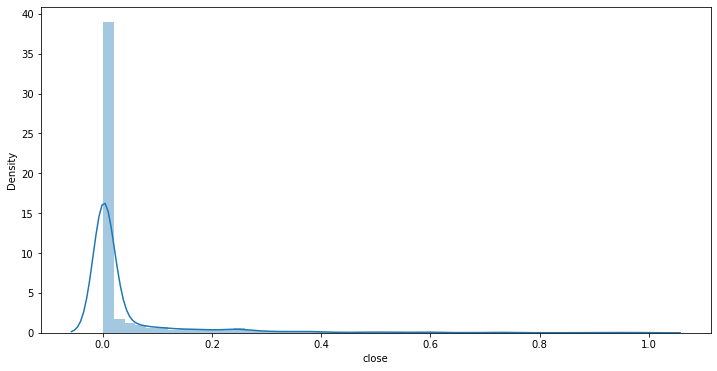

In [216]:
plt.figure(figsize=(12,6))
sns.distplot(normalized_df['close'])

<AxesSubplot:xlabel='volume', ylabel='Density'>

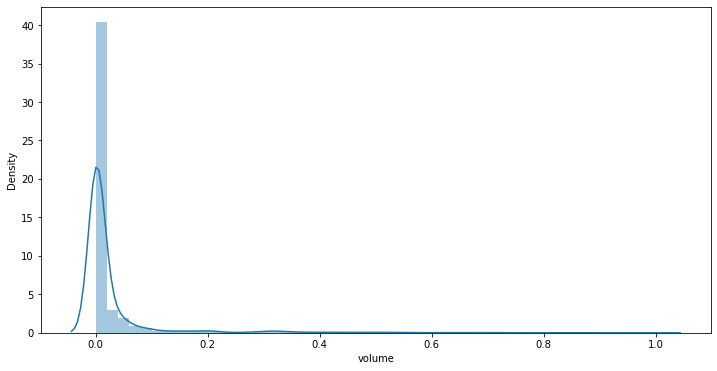

In [217]:
plt.figure(figsize=(12,6))
sns.distplot(normalized_df['volume'])

<AxesSubplot:xlabel='profit\\loss', ylabel='Density'>

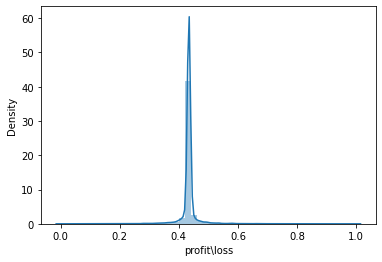

In [218]:
sns.distplot(normalized_df['profit\loss'])

#### Bitcoin normalization

In [219]:
btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-08-09,2013,8,9,103.070000,105.750000,101.930000,102.800000,0.000000e+00,1.185307e+09,0.227749,3.820000,-0.270000
1,bitcoin,BTC,Bitcoin,1,2013-08-10,2013,8,10,102.800000,103.900000,102.410000,103.000000,0.000000e+00,1.188154e+09,0.395973,1.490000,0.200000
2,bitcoin,BTC,Bitcoin,1,2013-08-11,2013,8,11,103.000000,105.190000,102.750000,105.000000,0.000000e+00,1.211789e+09,0.922131,2.440000,2.000000
3,bitcoin,BTC,Bitcoin,1,2013-08-12,2013,8,12,105.000000,108.000000,103.500000,106.640000,0.000000e+00,1.231249e+09,0.697778,4.500000,1.640000
4,bitcoin,BTC,Bitcoin,1,2013-08-13,2013,8,13,106.990000,109.350000,104.650000,109.000000,0.000000e+00,1.259043e+09,0.925532,4.700000,2.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,bitcoin,BTC,Bitcoin,1,2018-08-14,2018,8,14,6451.405689,6621.251150,6335.774033,6460.186531,4.308833e+09,1.111780e+11,0.435806,285.477117,8.780842
1832,bitcoin,BTC,Bitcoin,1,2018-08-15,2018,8,15,6459.773349,6601.330268,6333.869404,6450.806836,4.216518e+09,1.110292e+11,0.437213,267.460864,-8.966513
1833,bitcoin,BTC,Bitcoin,1,2018-08-16,2018,8,16,6450.854839,6592.792963,6330.889244,6460.125496,4.144467e+09,1.112023e+11,0.493449,261.903719,9.270658
1834,bitcoin,BTC,Bitcoin,1,2018-08-17,2018,8,17,6459.259331,6608.835135,6326.883254,6438.613165,4.070898e+09,1.108444e+11,0.396273,281.951881,-20.646166


<AxesSubplot:xlabel='volume', ylabel='Density'>

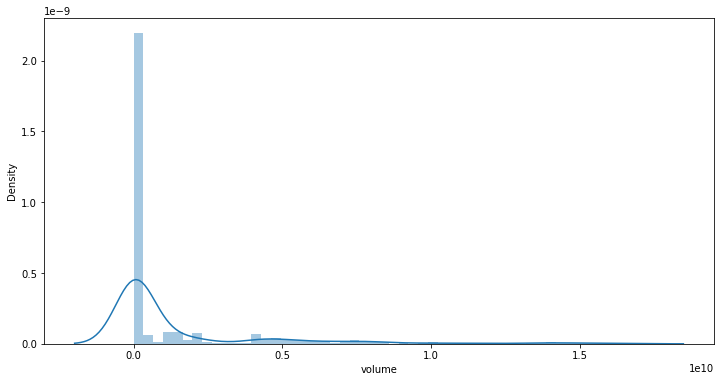

In [220]:
plt.figure(figsize=(12,6))
sns.distplot(btc['volume'])

In [221]:
btc['profit\loss'].min()

-467.6889407517847

In [222]:
for i in range (len(btc)):
    btc.at[btc.index==i,'profit\loss'] = btc[btc.index==i]['profit\loss'] + (467.6889407517847)

In [223]:
btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-08-09,2013,8,9,103.070000,105.750000,101.930000,102.800000,0.000000e+00,1.185307e+09,0.227749,3.820000,467.418941
1,bitcoin,BTC,Bitcoin,1,2013-08-10,2013,8,10,102.800000,103.900000,102.410000,103.000000,0.000000e+00,1.188154e+09,0.395973,1.490000,467.888941
2,bitcoin,BTC,Bitcoin,1,2013-08-11,2013,8,11,103.000000,105.190000,102.750000,105.000000,0.000000e+00,1.211789e+09,0.922131,2.440000,469.688941
3,bitcoin,BTC,Bitcoin,1,2013-08-12,2013,8,12,105.000000,108.000000,103.500000,106.640000,0.000000e+00,1.231249e+09,0.697778,4.500000,469.328941
4,bitcoin,BTC,Bitcoin,1,2013-08-13,2013,8,13,106.990000,109.350000,104.650000,109.000000,0.000000e+00,1.259043e+09,0.925532,4.700000,469.698941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,bitcoin,BTC,Bitcoin,1,2018-08-14,2018,8,14,6451.405689,6621.251150,6335.774033,6460.186531,4.308833e+09,1.111780e+11,0.435806,285.477117,476.469783
1832,bitcoin,BTC,Bitcoin,1,2018-08-15,2018,8,15,6459.773349,6601.330268,6333.869404,6450.806836,4.216518e+09,1.110292e+11,0.437213,267.460864,458.722427
1833,bitcoin,BTC,Bitcoin,1,2018-08-16,2018,8,16,6450.854839,6592.792963,6330.889244,6460.125496,4.144467e+09,1.112023e+11,0.493449,261.903719,476.959598
1834,bitcoin,BTC,Bitcoin,1,2018-08-17,2018,8,17,6459.259331,6608.835135,6326.883254,6438.613165,4.070898e+09,1.108444e+11,0.396273,281.951881,447.042774


In [224]:
normalized_btc = btc.copy()
for column in normalized_btc[cols_to_norm]:
    normalized_btc[column] = (normalized_btc[column] - normalized_btc[column].min()) / (normalized_btc[column].max() - normalized_btc[column].min())
normalized_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-08-09,2013,8,9,0.000015,0.000102,0.000000,0.000000,0.000000,0.000000,0.227749,0.001175,0.357711
1,bitcoin,BTC,Bitcoin,1,2013-08-10,2013,8,10,0.000000,0.000000,0.000029,0.000011,0.000000,0.000010,0.395973,0.000194,0.358071
2,bitcoin,BTC,Bitcoin,1,2013-08-11,2013,8,11,0.000011,0.000071,0.000050,0.000126,0.000000,0.000090,0.922131,0.000594,0.359448
3,bitcoin,BTC,Bitcoin,1,2013-08-12,2013,8,12,0.000126,0.000226,0.000095,0.000220,0.000000,0.000157,0.697778,0.001462,0.359173
4,bitcoin,BTC,Bitcoin,1,2013-08-13,2013,8,13,0.000240,0.000300,0.000165,0.000355,0.000000,0.000252,0.925532,0.001546,0.359456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,bitcoin,BTC,Bitcoin,1,2018-08-14,2018,8,14,0.363799,0.358556,0.377719,0.364238,0.261165,0.375662,0.435806,0.119841,0.364637
1832,bitcoin,BTC,Bitcoin,1,2018-08-15,2018,8,15,0.364278,0.357460,0.377604,0.363700,0.255569,0.375153,0.437213,0.112250,0.351056
1833,bitcoin,BTC,Bitcoin,1,2018-08-16,2018,8,16,0.363767,0.356991,0.377423,0.364234,0.251202,0.375745,0.493449,0.109909,0.365012
1834,bitcoin,BTC,Bitcoin,1,2018-08-17,2018,8,17,0.364249,0.357873,0.377180,0.363002,0.246743,0.374522,0.396273,0.118356,0.342117


<AxesSubplot:xlabel='volume', ylabel='Density'>

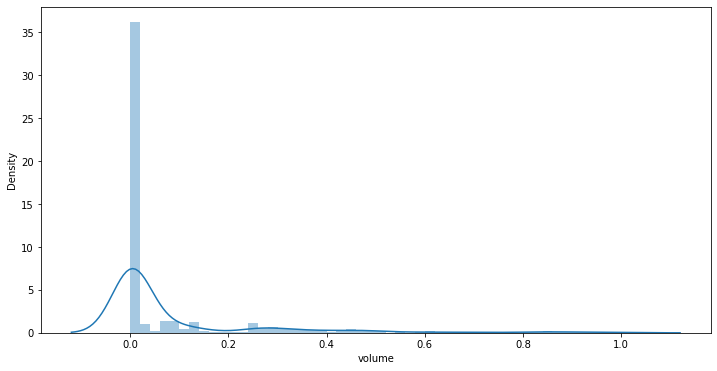

In [225]:
plt.figure(figsize=(12,6))
sns.distplot(normalized_btc['volume'])

In [226]:
normalized_df.to_csv('normalized_df.csv',index=False)

In [227]:
normalized_btc.to_csv('normalized_btc.csv',index=False)

#### Feature Selection

<AxesSubplot:>

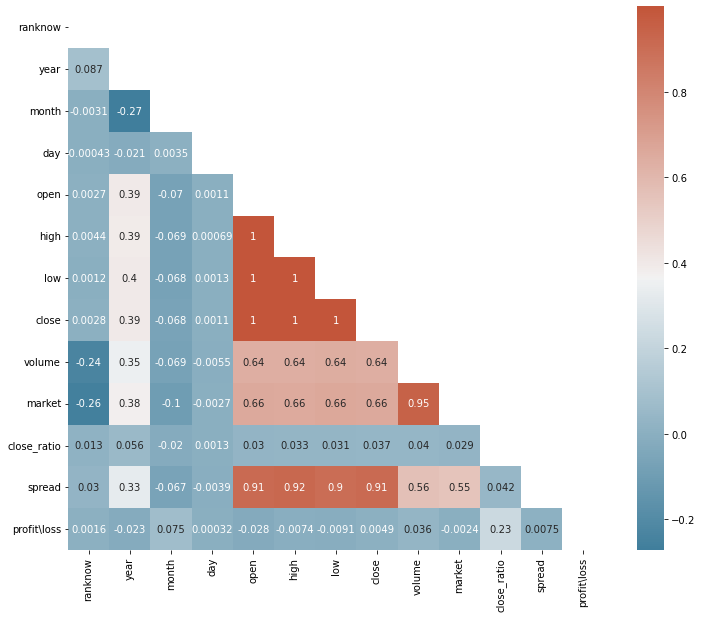

In [228]:
corr = normalized_df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

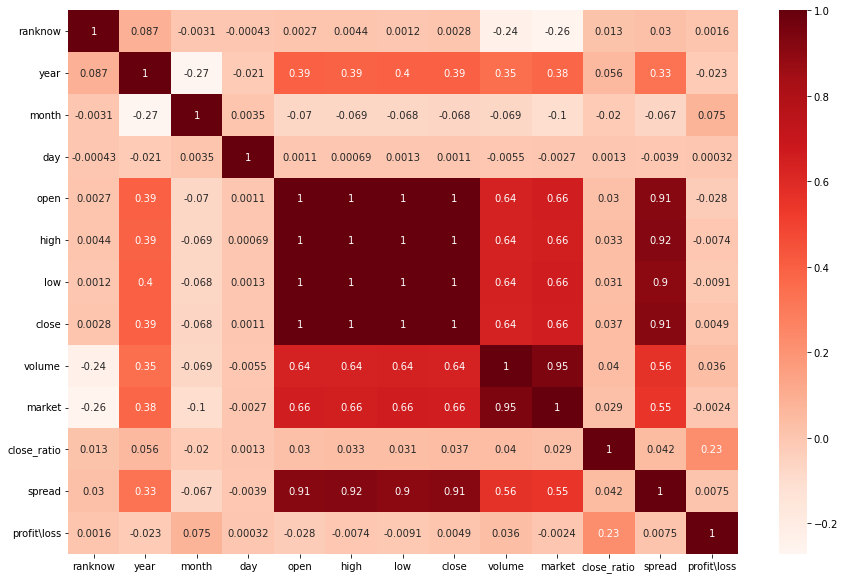

In [229]:
plt.figure(figsize=(15,10))
cor_df = normalized_df.corr()
sns.heatmap(cor_df, annot=True, cmap=plt.cm.Reds)
plt.show()

In [230]:
cor_target = abs(cor_df["close"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

open      0.999456
high      0.999709
low       0.999450
close     1.000000
volume    0.641956
market    0.659477
spread    0.914705
Name: close, dtype: float64

In [231]:
abs(normalized_df.corr()['close'][abs(normalized_df.corr()['close']) >0.5].drop('close')).index.tolist()

['open', 'high', 'low', 'volume', 'market', 'spread']

In [232]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features = abs(normalized_df.corr()['close'][abs(normalized_df.corr()['close']) >val].drop('close')).index.tolist()
    X = normalized_df.drop(columns='close')
    X = X[features]

    print(features)


['year', 'open', 'high', 'low', 'volume', 'market', 'spread']
['year', 'open', 'high', 'low', 'volume', 'market', 'spread']
['year', 'open', 'high', 'low', 'volume', 'market', 'spread']
['open', 'high', 'low', 'volume', 'market', 'spread']
['open', 'high', 'low', 'volume', 'market', 'spread']
['open', 'high', 'low', 'volume', 'market', 'spread']
['open', 'high', 'low', 'spread']


In [233]:
normalized_df.nunique()

slug               8
symbol             8
name               8
ranknow            8
date            1628
year               5
month             12
day               31
open            8385
high            8413
low             8331
close           8372
volume         11047
market         11039
close_ratio     8991
spread          6674
profit\loss     5502
dtype: int64

### Data Reduction

#### Attribute Feature Selection

In [234]:
normalized_df.drop(['open','low'],inplace=True,axis=1)

In [235]:
normalized_df

,slug,symbol,name,ranknow,date,year,month,day,high,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.000008,0.000008,0.000033,0.000605,0.345404,0.000004,0.434083
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.000007,0.000007,0.000046,0.000551,0.070657,0.000005,0.434081
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.000007,0.000007,0.000032,0.000549,0.231190,0.000003,0.434087
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.000007,0.000006,0.000058,0.000497,0.163623,0.000005,0.434081
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.000006,0.000006,0.000032,0.000498,0.902468,0.000003,0.434088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,0.015370,0.014910,0.013091,0.009434,0.066964,0.008509,0.423180
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,0.014730,0.015207,0.013099,0.009620,0.422078,0.005850,0.436296
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,0.014364,0.015240,0.013116,0.009643,0.403226,0.002355,0.433552
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,0.014334,0.014507,0.013224,0.009180,0.260606,0.006268,0.427797


In [236]:
normalized_df.name.unique

<bound method Series.unique of 0        XRP
1        XRP
2        XRP
3        XRP
4        XRP
        ... 
11082    NEO
11083    NEO
11084    NEO
11085    NEO
11086    NEO
Name: name, Length: 11087, dtype: object>

In [237]:
normalized_df

,slug,symbol,name,ranknow,date,year,month,day,high,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.000008,0.000008,0.000033,0.000605,0.345404,0.000004,0.434083
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.000007,0.000007,0.000046,0.000551,0.070657,0.000005,0.434081
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.000007,0.000007,0.000032,0.000549,0.231190,0.000003,0.434087
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.000007,0.000006,0.000058,0.000497,0.163623,0.000005,0.434081
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.000006,0.000006,0.000032,0.000498,0.902468,0.000003,0.434088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,0.015370,0.014910,0.013091,0.009434,0.066964,0.008509,0.423180
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,0.014730,0.015207,0.013099,0.009620,0.422078,0.005850,0.436296
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,0.014364,0.015240,0.013116,0.009643,0.403226,0.002355,0.433552
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,0.014334,0.014507,0.013224,0.009180,0.260606,0.006268,0.427797


In [238]:
normalized_df[normalized_df['close_ratio'].isna()== True]


,slug,symbol,name,ranknow,date,year,month,day,high,close,volume,market,close_ratio,spread,profit\loss
257,ripple,XRP,XRP,2,2014-12-12,2014,12,12,0.000012,0.000013,0.000304,0.004057,NaN,0.0,0.434087


In [239]:
normalized_df["close_ratio"].fillna(0, inplace = True)

In [240]:
normalized_df[normalized_df['close_ratio'].isna()== True]

,slug,symbol,name,ranknow,date,year,month,day,high,close,volume,market,close_ratio,spread,profit\loss


#### Dummy Values

In [241]:
pd.get_dummies(normalized_df)

,ranknow,date,year,month,day,high,close,volume,market,close_ratio,...,symbol_XMR,symbol_XRP,name_Dash,name_Ethereum,name_Litecoin,name_Monero,name_NEM,name_NEO,name_Stellar,name_XRP
0,2,2014-03-30,2014,3,30,0.000008,0.000008,0.000033,0.000605,0.345404,...,0,1,0,0,0,0,0,0,0,1
1,2,2014-03-31,2014,3,31,0.000007,0.000007,0.000046,0.000551,0.070657,...,0,1,0,0,0,0,0,0,0,1
2,2,2014-04-01,2014,4,1,0.000007,0.000007,0.000032,0.000549,0.231190,...,0,1,0,0,0,0,0,0,0,1
3,2,2014-04-02,2014,4,2,0.000007,0.000006,0.000058,0.000497,0.163623,...,0,1,0,0,0,0,0,0,0,1
4,2,2014-04-03,2014,4,3,0.000006,0.000006,0.000032,0.000498,0.902468,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,17,2018-09-08,2018,9,8,0.015370,0.014910,0.013091,0.009434,0.066964,...,0,0,0,0,0,0,0,1,0,0
11083,17,2018-09-09,2018,9,9,0.014730,0.015207,0.013099,0.009620,0.422078,...,0,0,0,0,0,0,0,1,0,0
11084,17,2018-09-10,2018,9,10,0.014364,0.015240,0.013116,0.009643,0.403226,...,0,0,0,0,0,0,0,1,0,0
11085,17,2018-09-11,2018,9,11,0.014334,0.014507,0.013224,0.009180,0.260606,...,0,0,0,0,0,0,0,1,0,0


In [242]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         11087 non-null  object        
 1   symbol       11087 non-null  object        
 2   name         11087 non-null  object        
 3   ranknow      11087 non-null  int64         
 4   date         11087 non-null  datetime64[ns]
 5   year         11087 non-null  int64         
 6   month        11087 non-null  int64         
 7   day          11087 non-null  int64         
 8   high         11087 non-null  float64       
 9   close        11087 non-null  float64       
 10  volume       11087 non-null  float64       
 11  market       11087 non-null  float64       
 12  close_ratio  11087 non-null  float64       
 13  spread       11087 non-null  float64       
 14  profit\loss  11087 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(3)

In [243]:
for ind in range(len(normalized_df)):
    normalized_df.at[ind,'day_name'] = normalized_df.loc[ind,'date'].day_name()

In [244]:
for ind in range(len(normalized_df)):
    normalized_df.at[ind,'month_name'] = normalized_df.loc[ind,'date'].month_name()

In [245]:
normalized_df[['year','day','ranknow','month']] = normalized_df[['year','day','ranknow','month']].astype(str)

In [246]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         11087 non-null  object        
 1   symbol       11087 non-null  object        
 2   name         11087 non-null  object        
 3   ranknow      11087 non-null  object        
 4   date         11087 non-null  datetime64[ns]
 5   year         11087 non-null  object        
 6   month        11087 non-null  object        
 7   day          11087 non-null  object        
 8   high         11087 non-null  float64       
 9   close        11087 non-null  float64       
 10  volume       11087 non-null  float64       
 11  market       11087 non-null  float64       
 12  close_ratio  11087 non-null  float64       
 13  spread       11087 non-null  float64       
 14  profit\loss  11087 non-null  float64       
 15  day_name     11087 non-null  object        
 16  mont

In [247]:
normalized_df

,slug,symbol,name,ranknow,date,year,month,day,high,close,volume,market,close_ratio,spread,profit\loss,day_name,month_name
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.000008,0.000008,0.000033,0.000605,0.345404,0.000004,0.434083,Sunday,March
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.000007,0.000007,0.000046,0.000551,0.070657,0.000005,0.434081,Monday,March
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.000007,0.000007,0.000032,0.000549,0.231190,0.000003,0.434087,Tuesday,April
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.000007,0.000006,0.000058,0.000497,0.163623,0.000005,0.434081,Wednesday,April
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.000006,0.000006,0.000032,0.000498,0.902468,0.000003,0.434088,Thursday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,0.015370,0.014910,0.013091,0.009434,0.066964,0.008509,0.423180,Saturday,September
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,0.014730,0.015207,0.013099,0.009620,0.422078,0.005850,0.436296,Sunday,September
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,0.014364,0.015240,0.013116,0.009643,0.403226,0.002355,0.433552,Monday,September
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,0.014334,0.014507,0.013224,0.009180,0.260606,0.006268,0.427797,Tuesday,September


In [248]:
normalized_df = pd.get_dummies(normalized_df)

In [249]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Columns: 107 entries, date to month_name_September
dtypes: datetime64[ns](1), float64(7), uint8(99)
memory usage: 1.7 MB


In [250]:
normalized_df

,date,high,close,volume,market,close_ratio,spread,profit\loss,slug_dash,slug_ethereum,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
0,2014-03-30,0.000008,0.000008,0.000033,0.000605,0.345404,0.000004,0.434083,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2014-03-31,0.000007,0.000007,0.000046,0.000551,0.070657,0.000005,0.434081,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2014-04-01,0.000007,0.000007,0.000032,0.000549,0.231190,0.000003,0.434087,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014-04-02,0.000007,0.000006,0.000058,0.000497,0.163623,0.000005,0.434081,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-04-03,0.000006,0.000006,0.000032,0.000498,0.902468,0.000003,0.434088,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,2018-09-08,0.015370,0.014910,0.013091,0.009434,0.066964,0.008509,0.423180,0,0,...,0,0,0,0,0,0,0,0,0,1
11083,2018-09-09,0.014730,0.015207,0.013099,0.009620,0.422078,0.005850,0.436296,0,0,...,0,0,0,0,0,0,0,0,0,1
11084,2018-09-10,0.014364,0.015240,0.013116,0.009643,0.403226,0.002355,0.433552,0,0,...,0,0,0,0,0,0,0,0,0,1
11085,2018-09-11,0.014334,0.014507,0.013224,0.009180,0.260606,0.006268,0.427797,0,0,...,0,0,0,0,0,0,0,0,0,1


In [251]:
normalized_df.set_index('date',drop=True)

,high,close,volume,market,close_ratio,spread,profit\loss,slug_dash,slug_ethereum,slug_litecoin,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
date,,,,,,,,,,,,,,,,,,,,,
2014-03-30,0.000008,0.000008,0.000033,0.000605,0.345404,0.000004,0.434083,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014-03-31,0.000007,0.000007,0.000046,0.000551,0.070657,0.000005,0.434081,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014-04-01,0.000007,0.000007,0.000032,0.000549,0.231190,0.000003,0.434087,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-02,0.000007,0.000006,0.000058,0.000497,0.163623,0.000005,0.434081,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-03,0.000006,0.000006,0.000032,0.000498,0.902468,0.000003,0.434088,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-08,0.015370,0.014910,0.013091,0.009434,0.066964,0.008509,0.423180,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-09-09,0.014730,0.015207,0.013099,0.009620,0.422078,0.005850,0.436296,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-09-10,0.014364,0.015240,0.013116,0.009643,0.403226,0.002355,0.433552,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### BTC dummy

In [252]:
normalized_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         1836 non-null   object        
 1   symbol       1836 non-null   object        
 2   name         1836 non-null   object        
 3   ranknow      1836 non-null   int64         
 4   date         1836 non-null   datetime64[ns]
 5   year         1836 non-null   int64         
 6   month        1836 non-null   int64         
 7   day          1836 non-null   int64         
 8   open         1836 non-null   float64       
 9   high         1836 non-null   float64       
 10  low          1836 non-null   float64       
 11  close        1836 non-null   float64       
 12  volume       1836 non-null   float64       
 13  market       1836 non-null   float64       
 14  close_ratio  1836 non-null   float64       
 15  spread       1836 non-null   float64       
 16  profit

In [253]:
for ind in range(len(normalized_btc)):
    normalized_btc.at[ind,'day_name'] = normalized_btc.loc[ind,'date'].day_name()
for ind in range(len(normalized_btc)):
    normalized_btc.at[ind,'month_name'] = normalized_btc.loc[ind,'date'].month_name()
normalized_btc[['year','day','ranknow','month']] = normalized_btc[['year','day','ranknow','month']].astype(str)



In [254]:
normalized_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         1836 non-null   object        
 1   symbol       1836 non-null   object        
 2   name         1836 non-null   object        
 3   ranknow      1836 non-null   object        
 4   date         1836 non-null   datetime64[ns]
 5   year         1836 non-null   object        
 6   month        1836 non-null   object        
 7   day          1836 non-null   object        
 8   open         1836 non-null   float64       
 9   high         1836 non-null   float64       
 10  low          1836 non-null   float64       
 11  close        1836 non-null   float64       
 12  volume       1836 non-null   float64       
 13  market       1836 non-null   float64       
 14  close_ratio  1836 non-null   float64       
 15  spread       1836 non-null   float64       
 16  profit

In [255]:
normalized_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss,day_name,month_name
0,bitcoin,BTC,Bitcoin,1,2013-08-09,2013,8,9,0.000015,0.000102,0.000000,0.000000,0.000000,0.000000,0.227749,0.001175,0.357711,Friday,August
1,bitcoin,BTC,Bitcoin,1,2013-08-10,2013,8,10,0.000000,0.000000,0.000029,0.000011,0.000000,0.000010,0.395973,0.000194,0.358071,Saturday,August
2,bitcoin,BTC,Bitcoin,1,2013-08-11,2013,8,11,0.000011,0.000071,0.000050,0.000126,0.000000,0.000090,0.922131,0.000594,0.359448,Sunday,August
3,bitcoin,BTC,Bitcoin,1,2013-08-12,2013,8,12,0.000126,0.000226,0.000095,0.000220,0.000000,0.000157,0.697778,0.001462,0.359173,Monday,August
4,bitcoin,BTC,Bitcoin,1,2013-08-13,2013,8,13,0.000240,0.000300,0.000165,0.000355,0.000000,0.000252,0.925532,0.001546,0.359456,Tuesday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,bitcoin,BTC,Bitcoin,1,2018-08-14,2018,8,14,0.363799,0.358556,0.377719,0.364238,0.261165,0.375662,0.435806,0.119841,0.364637,Tuesday,August
1832,bitcoin,BTC,Bitcoin,1,2018-08-15,2018,8,15,0.364278,0.357460,0.377604,0.363700,0.255569,0.375153,0.437213,0.112250,0.351056,Wednesday,August
1833,bitcoin,BTC,Bitcoin,1,2018-08-16,2018,8,16,0.363767,0.356991,0.377423,0.364234,0.251202,0.375745,0.493449,0.109909,0.365012,Thursday,August
1834,bitcoin,BTC,Bitcoin,1,2018-08-17,2018,8,17,0.364249,0.357873,0.377180,0.363002,0.246743,0.374522,0.396273,0.118356,0.342117,Friday,August


In [256]:
normalized_btc = pd.get_dummies(normalized_btc)

In [257]:
normalized_btc

,date,open,high,low,close,volume,market,close_ratio,spread,profit\loss,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
0,2013-08-09,0.000015,0.000102,0.000000,0.000000,0.000000,0.000000,0.227749,0.001175,0.357711,...,0,0,0,0,0,0,0,0,0,0
1,2013-08-10,0.000000,0.000000,0.000029,0.000011,0.000000,0.000010,0.395973,0.000194,0.358071,...,0,0,0,0,0,0,0,0,0,0
2,2013-08-11,0.000011,0.000071,0.000050,0.000126,0.000000,0.000090,0.922131,0.000594,0.359448,...,0,0,0,0,0,0,0,0,0,0
3,2013-08-12,0.000126,0.000226,0.000095,0.000220,0.000000,0.000157,0.697778,0.001462,0.359173,...,0,0,0,0,0,0,0,0,0,0
4,2013-08-13,0.000240,0.000300,0.000165,0.000355,0.000000,0.000252,0.925532,0.001546,0.359456,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2018-08-14,0.363799,0.358556,0.377719,0.364238,0.261165,0.375662,0.435806,0.119841,0.364637,...,0,0,0,0,0,0,0,0,0,0
1832,2018-08-15,0.364278,0.357460,0.377604,0.363700,0.255569,0.375153,0.437213,0.112250,0.351056,...,0,0,0,0,0,0,0,0,0,0
1833,2018-08-16,0.363767,0.356991,0.377423,0.364234,0.251202,0.375745,0.493449,0.109909,0.365012,...,0,0,0,0,0,0,0,0,0,0
1834,2018-08-17,0.364249,0.357873,0.377180,0.363002,0.246743,0.374522,0.396273,0.118356,0.342117,...,0,0,0,0,0,0,0,0,0,0


In [258]:
normalized_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1836 non-null   datetime64[ns]
 1   open                  1836 non-null   float64       
 2   high                  1836 non-null   float64       
 3   low                   1836 non-null   float64       
 4   close                 1836 non-null   float64       
 5   volume                1836 non-null   float64       
 6   market                1836 non-null   float64       
 7   close_ratio           1836 non-null   float64       
 8   spread                1836 non-null   float64       
 9   profit\loss           1836 non-null   float64       
 10  slug_bitcoin          1836 non-null   uint8         
 11  symbol_BTC            1836 non-null   uint8         
 12  name_Bitcoin          1836 non-null   uint8         
 13  ranknow_1         

In [259]:
normalized_btc

,date,open,high,low,close,volume,market,close_ratio,spread,profit\loss,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
0,2013-08-09,0.000015,0.000102,0.000000,0.000000,0.000000,0.000000,0.227749,0.001175,0.357711,...,0,0,0,0,0,0,0,0,0,0
1,2013-08-10,0.000000,0.000000,0.000029,0.000011,0.000000,0.000010,0.395973,0.000194,0.358071,...,0,0,0,0,0,0,0,0,0,0
2,2013-08-11,0.000011,0.000071,0.000050,0.000126,0.000000,0.000090,0.922131,0.000594,0.359448,...,0,0,0,0,0,0,0,0,0,0
3,2013-08-12,0.000126,0.000226,0.000095,0.000220,0.000000,0.000157,0.697778,0.001462,0.359173,...,0,0,0,0,0,0,0,0,0,0
4,2013-08-13,0.000240,0.000300,0.000165,0.000355,0.000000,0.000252,0.925532,0.001546,0.359456,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2018-08-14,0.363799,0.358556,0.377719,0.364238,0.261165,0.375662,0.435806,0.119841,0.364637,...,0,0,0,0,0,0,0,0,0,0
1832,2018-08-15,0.364278,0.357460,0.377604,0.363700,0.255569,0.375153,0.437213,0.112250,0.351056,...,0,0,0,0,0,0,0,0,0,0
1833,2018-08-16,0.363767,0.356991,0.377423,0.364234,0.251202,0.375745,0.493449,0.109909,0.365012,...,0,0,0,0,0,0,0,0,0,0
1834,2018-08-17,0.364249,0.357873,0.377180,0.363002,0.246743,0.374522,0.396273,0.118356,0.342117,...,0,0,0,0,0,0,0,0,0,0


In [260]:
normalized_df.set_index('date',inplace=True)

In [261]:
normalized_btc.set_index('date',inplace=True)

In [262]:
normalized_df.to_csv('df.csv')

In [263]:
normalized_btc.to_csv('btc.csv')

In [264]:
normalized_btc

,open,high,low,close,volume,market,close_ratio,spread,profit\loss,slug_bitcoin,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
date,,,,,,,,,,,,,,,,,,,,,
2013-08-09,0.000015,0.000102,0.000000,0.000000,0.000000,0.000000,0.227749,0.001175,0.357711,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-10,0.000000,0.000000,0.000029,0.000011,0.000000,0.000010,0.395973,0.000194,0.358071,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-11,0.000011,0.000071,0.000050,0.000126,0.000000,0.000090,0.922131,0.000594,0.359448,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-12,0.000126,0.000226,0.000095,0.000220,0.000000,0.000157,0.697778,0.001462,0.359173,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-13,0.000240,0.000300,0.000165,0.000355,0.000000,0.000252,0.925532,0.001546,0.359456,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-14,0.363799,0.358556,0.377719,0.364238,0.261165,0.375662,0.435806,0.119841,0.364637,1,...,0,0,0,0,0,0,0,0,0,0
2018-08-15,0.364278,0.357460,0.377604,0.363700,0.255569,0.375153,0.437213,0.112250,0.351056,1,...,0,0,0,0,0,0,0,0,0,0
2018-08-16,0.363767,0.356991,0.377423,0.364234,0.251202,0.375745,0.493449,0.109909,0.365012,1,...,0,0,0,0,0,0,0,0,0,0


In [265]:
normalized_df.head(10)

,high,close,volume,market,close_ratio,spread,profit\loss,slug_dash,slug_ethereum,slug_litecoin,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
date,,,,,,,,,,,,,,,,,,,,,
2014-03-30,0.000008,0.000008,0.000033,0.000605,0.345404,4.091166e-06,0.434083,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014-03-31,0.000007,0.000007,0.000046,0.000551,0.070657,4.569799e-06,0.434081,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014-04-01,0.000007,0.000007,0.000032,0.000549,0.231190,2.776827e-06,0.434087,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-02,0.000007,0.000006,0.000058,0.000497,0.163623,4.991451e-06,0.434081,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-03,0.000006,0.000006,0.000032,0.000498,0.902468,3.232667e-06,0.434088,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-04,0.000006,0.000007,0.000025,0.000508,0.718750,2.309591e-06,0.434088,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-05,0.000006,0.000007,0.000014,0.000522,0.938865,1.739790e-06,0.434089,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-06,0.000006,0.000007,0.000018,0.000517,0.482456,8.660965e-07,0.434087,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-07,0.000006,0.000007,0.000012,0.000504,0.145985,1.040835e-06,0.434086,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
normalized_btc.head(10)

,open,high,low,close,volume,market,close_ratio,spread,profit\loss,slug_bitcoin,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
date,,,,,,,,,,,,,,,,,,,,,
2013-08-09,0.000015,0.000102,0.000000,0.000000,0.0,0.000000,0.227749,0.001175,0.357711,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-10,0.000000,0.000000,0.000029,0.000011,0.0,0.000010,0.395973,0.000194,0.358071,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-11,0.000011,0.000071,0.000050,0.000126,0.0,0.000090,0.922131,0.000594,0.359448,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-12,0.000126,0.000226,0.000095,0.000220,0.0,0.000157,0.697778,0.001462,0.359173,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-13,0.000240,0.000300,0.000165,0.000355,0.0,0.000252,0.925532,0.001546,0.359456,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-14,0.000387,0.000611,0.000368,0.000559,0.0,0.000394,0.651429,0.002515,0.360213,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-15,0.000559,0.000514,0.000428,0.000412,0.0,0.000294,0.232941,0.001357,0.355951,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-16,0.000413,0.000462,0.000399,0.000355,0.0,0.000256,0.124339,0.001159,0.357145,1,...,0,0,0,0,0,0,0,0,0,0
2013-08-17,0.000355,0.000542,0.000381,0.000613,0.0,0.000436,0.954792,0.001896,0.361369,1,...,0,0,0,0,0,0,0,0,0,0
